In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [36]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
data[data['Class']==1].describe()    

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [39]:
data['Scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['Scaled_Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [40]:
X = data.iloc[:, data.columns != "Class"]
Y = data.iloc[:, data.columns == "Class"]

In [41]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [42]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [44]:
clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.80      0.79       147

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [46]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[85264    32]
 [   29   118]]


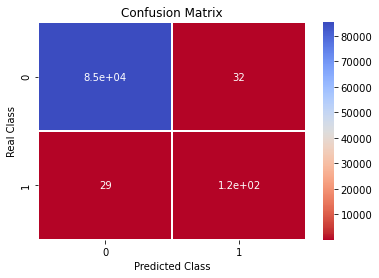

In [47]:
sns.heatmap(matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9011729621505328


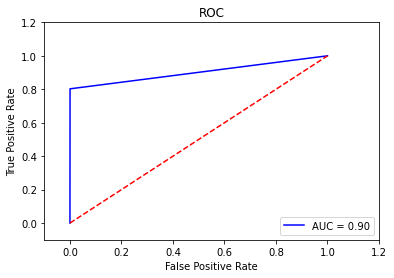

In [49]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
clf = RandomForestClassifier()
clf.fit(X, Y)
important_feat = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(important_feat)

<ipython-input-50-16d0ab9b3e81>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


V17              0.190063
V12              0.137207
V10              0.092585
V14              0.088748
V16              0.058397
V11              0.056355
V9               0.033006
V4               0.032884
V18              0.028710
V7               0.025057
V3               0.020806
V26              0.019973
V21              0.016172
V20              0.016127
V6               0.014530
V1               0.014310
V2               0.013450
Scaled_Time      0.013202
V8               0.012295
V15              0.011649
Scaled_Amount    0.011614
V5               0.011518
V27              0.011310
V13              0.011305
V19              0.011065
V28              0.009849
V22              0.009756
V24              0.009453
V25              0.009414
V23              0.009192
dtype: float64


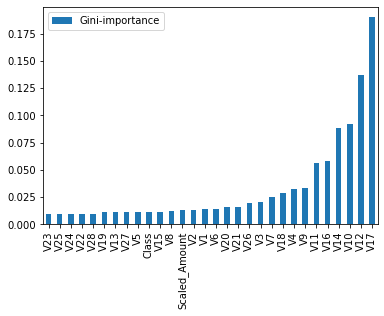

In [51]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.show()

In [52]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X[['V3','V9','V10','V11','V12','V14','V16','V17','V18']], Y, 
                                                    test_size=0.30, random_state=50)

In [53]:
X_train_new.head()

,V3,V9,V10,V11,V12,V14,V16,V17,V18
146142,-1.287334,0.267842,-0.934395,-1.008707,0.278703,0.238786,-0.518669,-0.578432,-0.848737
16983,-0.457460,-0.853811,-0.423586,-1.479606,0.593061,0.826582,0.360994,-0.159564,-0.075954
234010,0.370325,2.259568,-0.294023,-2.324652,1.185635,-1.521582,-0.074601,-0.348713,0.253053
128805,0.322262,-0.495104,0.321087,-0.278972,-0.517043,-0.345351,1.549816,0.065207,-0.751909
75014,1.458852,-0.763078,-0.052042,1.611792,0.837880,0.623785,-0.507723,0.163926,-0.190041


In [54]:
y_train_new.head()

,Class
146142,0
16983,0
234010,0
128805,0
75014,0


In [55]:
clf_new= DecisionTreeClassifier()
clf_new.fit(X_train_new, y_train_new)
pred_new = clf_new.predict(X_test_new)

In [56]:
print(classification_report(y_test_new, pred_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.76      0.76       147

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [57]:
matrix_new = confusion_matrix(y_test_new, pred_new)
print(matrix_new)

[[85263    33]
 [   36   111]]


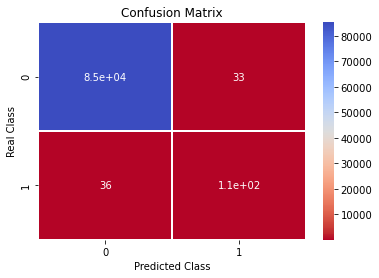

In [58]:
sns.heatmap(matrix_new, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, pred_new)
roc_auc_lr_new = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_new)

0.8773575764014102


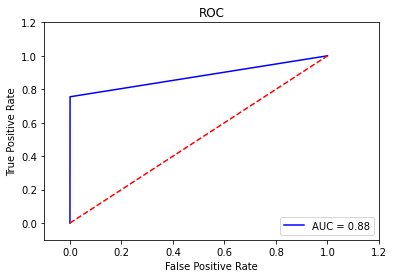

In [60]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_new)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
clf_new= RandomForestClassifier()
clf_new.fit(X_train_new, y_train_new)
pred_new = clf_new.predict(X_test_new)

<ipython-input-61-49aa4999c3f6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_new.fit(X_train_new, y_train_new)


In [62]:
print(classification_report(y_test_new, pred_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.79      0.85       147

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [63]:
matrix_new = confusion_matrix(y_test_new, pred_new)
print(matrix_new)

[[85285    11]
 [   31   116]]


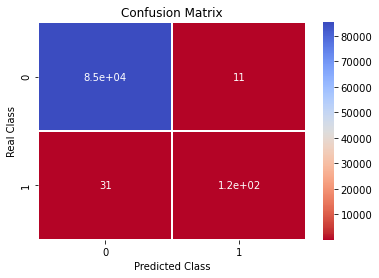

In [64]:
sns.heatmap(matrix_new, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [65]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, pred_new)
roc_auc_lr_new = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_new)

0.8944933417936674


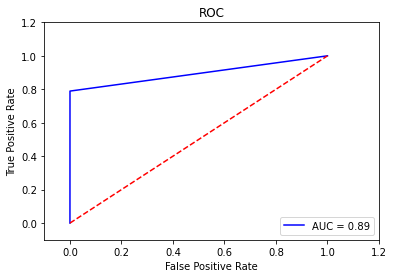

In [66]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_new)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
